<h2 style="text-align: center; line-height: 0px;">CHBI 422 / 522</h2>
<h3 style="text-align: center; line-height: 0px;">Spring 2022</h3>
<h3 style="text-align: center; line-height: 0px;">Homework 3</h3>
<h4 style="text-align: center; line-height: 0px;">Due date: April 11, 2022 - 23:59</h4>

<hr>

To complete these homework, you will use Google Colab. If you experience any problems please get in touch with the TA: zabali16@ku.edu.tr

**Submission** <br>
After you are done and passed all the test, please submit this notebook to Blackboard. If you are not getting full points from a test, you may be failing some hidden tests. Think about the edge cases (your code might be working in general, but failing for some special cases). Please do not forget to **save** your work before you submit, and **check** whether you are in the final version.

**Instructions**<br>

$\color{purple}{\small{\text{Visit the RCSB PDB website (https://www.rcsb.org/).
Use RCSB PDB advanced search to find a protein that has the following properties:}}}$

* It should be an enzyme.
* It should have only a single chain.
* It should have a residue count between 40 and 90.
* The experimental method should be X-ray diffraction.
* The protein should have at least four secondary structures.



---



$\color{red}{\text{Essay Part (Total: 20 points)}}$


$\color{purple}{\small{\text{▶ Which PDB ID did you choose? Put the link for your selected protein in the below text box. (3 points)}}}$

2RH2

https://www.rcsb.org/structure/2RH2


$\color{purple}{\small{\text{▶ Find the principal article of the paper. What is the function of the protein as you understand from the paper? What is the main emphasis of the paper, with at most three sentences? (3 points)}}}$

$\color{purple}{\small{\text{▶ What is the EC number of your enzyme, what does it tell you? (3 points)}}}$


EC number is for grouping the enzymes with similar function. My protein's EC number is EC: 1.5.1.3



$\color{purple}{\small{\text{▶ How many helices and strands exist in the PDB file? (3 points)}}}$


There are 4 beta strands

$\color{purple}{\small{\text{▶ Which year was the structure deposited? (3 points)}}}$


it was deposited on 2007



---



$\color{red}{\text{Calculations Part - A (Total: 40 points)}}$






$\color{purple}{\small{\text{▶ Read in all coordinates and residue types. You can use your code from Homework 2, or write a new one. (You can add new code cells, as you need, below)}}}$


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
def read_pdb_file(file_path):
    """ Read the coordinates of atoms from a PDB file and return a dictionary of coordinate lists 
        You may want to check np.genfromtxt() and its additional parameters, or you can use any 
        file reading method you feel comfortable
        You will need "Atom type", "Residue Number", "X-Y-Z" coordinates 
        Your final output should look like:
        {"Residue number": {"Atom type": [x-y-z coordinates]}}"""
    
    # YOUR CODE HERE
    pdb = np.genfromtxt(file_path, names = 'atom_no,atom_type,res_type,chain,res_no,x,y,z,occup, b-fact, atom', encoding='utf-8',
                    dtype=None)
    coordinates = np.expand_dims((np.array([pdb['x'], pdb['y'], pdb['z']]).T), axis=1)
    coordinates = coordinates.reshape(len(pdb)//3, 3, 1, 3)
    pdb_dict, res_dict = {}, {}

    dataframe = pd.DataFrame()
    for i in range(len(pdb['res_type'])):
      if (len(pdb['res_type'][i]) == 4):
        pdb['res_type'][i] = pdb['res_type'][i][1:]
    dataframe['res_type'] = pdb['res_type']
    dataframe['res_no'] =pdb['res_no']
    dataframe=dataframe.drop_duplicates().reset_index(drop=True)

    for res_no in range(len(set(pdb['res_no']))):
       res_dict[res_no+1] = dataframe['res_type'][res_no]
       pdb_dict[res_no+1] = {}
       res_coordinates = coordinates[res_no]
       for i in range(3):
          pdb_dict[res_no+1][pdb['atom_type'][0:3][i]] = np.squeeze(res_coordinates[i]).tolist()

    return pdb_dict, res_dict, dataframe

In [ ]:
import numpy as np
out = []
with open("/content/drive/MyDrive/2rh2.pdb") as pdb: 
  lines = pdb.readlines()
  for line in lines:
    arr_line = line.split()
    #print(line[0:4])
    if (arr_line[0] == "ATOM"):
      #print(arr_line)
      if (arr_line[2] == 'C' or arr_line[2] == 'CA'or arr_line[2] == 'N' ) and len(arr_line[2])<4 and arr_line[3][0]!='B'  :
        out.append(line[7:])
      

file1 = open('/content/drive/MyDrive/2rh2_reformated.txt',"w")
file1.writelines(out[1:])
file1.close()


172


['   1  C   ASN A  21       9.994  -6.024  22.419  0.60 20.54           C  \n',
 '   3  N   ALA A  22       9.382  -4.865  22.154  1.00 23.27           N  \n',
 '   4  CA  ALA A  22       9.429  -4.234  20.854  1.00 19.38           C  \n',
 '   5  C   ALA A  22      10.819  -3.732  20.529  1.00 15.96           C  \n',
 '  13  N   THR A  23      11.216  -3.988  19.298  1.00 14.03           N  \n',
 '  14  CA  THR A  23      12.487  -3.529  18.757  1.00 13.34           C  \n',
 '  15  C   THR A  23      12.586  -2.016  18.608  1.00 11.97           C  \n',
 '  27  N   PHE A  24      11.490  -1.400  18.163  1.00 10.83           N  \n',
 '  28  CA  PHE A  24      11.445   0.021  17.953  1.00 10.09           C  \n',
 '  29  C   PHE A  24      10.369   0.622  18.794  1.00 10.57           C  \n',
 '  47  N   GLY A  25      10.488   1.920  19.028  1.00 10.90           N  \n',
 '  48  CA  GLY A  25       9.486   2.712  19.695  1.00 12.64           C  \n',
 '  49  C   GLY A  25       8.999   3.86

In [ ]:
pdb_dict, res_dict, res_df  = read_pdb_file('/content/drive/MyDrive/2rh2_reformated.txt')

In [ ]:
pdb_dict

{1: {'C': [10.819, -3.732, 20.529],
  'CA': [9.429, -4.234, 20.854],
  'N': [9.382, -4.865, 22.154]},
 2: {'C': [12.586, -2.016, 18.608],
  'CA': [12.487, -3.529, 18.757],
  'N': [11.216, -3.988, 19.298]},
 3: {'C': [10.369, 0.622, 18.794],
  'CA': [11.445, 0.021, 17.953],
  'N': [11.49, -1.4, 18.163]},
 4: {'C': [8.999, 3.863, 18.817],
  'CA': [9.486, 2.712, 19.695],
  'N': [10.488, 1.92, 19.028]},
 5: {'C': [8.379, 6.674, 18.401],
  'CA': [7.323, 5.584, 18.526],
  'N': [7.88, 4.45, 19.227]},
 6: {'C': [10.828, 7.888, 16.524],
  'CA': [9.442, 8.297, 16.963],
  'N': [8.512, 7.224, 17.207]},
 7: {'C': [12.568, 6.458, 14.665],
  'CA': [12.479, 6.172, 16.146],
  'N': [11.168, 6.605, 16.639]},
 8: {'C': [14.558, 5.756, 12.239],
  'CA': [14.017, 7.045, 12.787],
  'N': [13.741, 6.881, 14.211]},
 9: {'C': [14.275, 4.053, 9.122],
  'CA': [14.229, 3.945, 10.622],
  'N': [13.895, 5.227, 11.21]},
 10: {'C': [14.685, 1.408, 6.749],
  'CA': [14.86, 2.865, 7.102],
  'N': [14.868, 3.015, 8.527]},
 11

$\color{purple}{\small{\text{▶ Calculate the amino acid composition of the protein (0,5% Ala, etc.)}}}$


In [322]:
res_count = res_df.groupby("res_type").count()
res_count['percentage'] = (res_count['res_no'] / 58 ) * 100
res_count

,res_no,percentage
res_type,,
ALA,7,12.068966
ARG,3,5.172414
ASN,2,3.448276
ASP,1,1.724138
CYS,1,1.724138
GLN,3,5.172414
GLU,4,6.896552
GLY,7,12.068966
HIS,1,1.724138


$\color{purple}{\small{\text{▶ Using the mole fractions, what is the structural class of your protein.}}}$
$\color{purple}{\scriptsize {\text{Hint: What are the highest probabilities that these amino acids will belong to, i.e. helix/strand or both.}}}$


Alanine (ALA), Glutamic Acid (GLU), Leucine (LEU) and Methionine (MET) are favored in alpha helices. Where Proline (PRO), Glycine (GLY), Tyrosine (TYR) and Serine (Ser) are disfavored. 
The most prevalent two amino acids are Alanine and Glycine .

$\color{purple}{\small{\text{▶ Evaluate all the bond lengths and torsional angles. (i.e., phi, psi, omega)}}}$


In [ ]:
def calculate_phi(aa1, aa2):
    """ Given two consecutive amino acids, calculate the phi angle for the second one
        Return the angle in degrees """
    # YOUR CODE HERE
    c_1 = np.array(aa1['C'])
    n_2 = np.array(aa2['N'])
    ca_2 = np.array(aa2['CA'])
    c_2 = np.array(aa2['C'])

    l_1 = n_2 - c_1
    l_2 = ca_2 - n_2
    l_3 = c_2 - ca_2
    
    n_1 = np.cross(l_1, l_2)
    n_2 = np.cross(l_2, l_3)

    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u,v)
    radians = np.arccos(u_dot_v)

    sign = np.sign(np.dot(n_1,l_3))
    phi = np.degrees(radians)
  
    if sign <0:
        phi = -1 * phi

    return phi

In [ ]:
def calculate_psi(aa1, aa2):
    """ Given two consecutive amino acids, calculate the psi angle for the first one 
        Return the angle in degrees """
    # YOUR CODE HERE
    n_1 = np.array(aa1['N'])
    ca_1 = np.array(aa1['CA'])
    c_1 = np.array(aa1['C'])
    n_2 = np.array(aa2['N'])
    
    l_1 = ca_1 - n_1
    l_2 = c_1 - ca_1
    l_3 = n_2 - c_1

    n_1 = np.cross(l_1, l_2)
    n_2 = np.cross(l_2, l_3)
  
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u,v)
    radians = np.arccos(u_dot_v)

    sign = np.sign(np.dot(n_1,l_3))
    psi = np.degrees(radians)
 
    if sign <0:
        psi = -1 * psi

    return psi

In [ ]:
def calculate_omega(aa1, aa2):
    """ Given two consecutive amino acids, calculate the omega angle between them 
        Return the angle in degrees """
    # YOUR CODE HERE
    
    ca_1 = np.array(aa1['CA'])
    c_1 = np.array(aa1['C'])
    n_2 = np.array(aa2['N'])
    ca_2 = np.array(aa2['CA'])
    
    l_1 = c_1 - ca_1
    l_2 = n_2 - c_1
    l_3 = ca_2 - n_2

    n_1 = np.cross(l_1, l_2)
    n_2 = np.cross(l_2, l_3)
       
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u,v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(n_1,l_3))
    omega = np.degrees(radians)
    
    if sign <0:
        omega = -1 * omega

    return omega

In [ ]:
def calculate_all(protein_dict):
    """ For a given amino acid sequence, calculate all possible phi, psi, omega, theta angles and bond distances,
        vectors, using the functions defined before """
    # YOUR CODE HERE
    phi_list, psi_list, omega_list = [], [], []
    phi_list.append(np.degrees(np.pi))
    for i in range(1, len(protein_dict)):
      phi_list.append(calculate_phi(protein_dict[i], protein_dict[i+1]))
      psi_list.append(calculate_psi(protein_dict[i], protein_dict[i+1]))
      omega_list.append(calculate_omega(protein_dict[i], protein_dict[i+1]))
    
    
    psi_list.append(None)
    omega_list.append(None)

    return phi_list, psi_list, omega_list

In [ ]:
def calculate_tetha(vec1, vec2):
  unit1 = vec1 / np.linalg.norm(vec1)
  unit2 = vec2 / np.linalg.norm(vec2)

  return np.degrees(np.arccos(np.clip(np.dot(unit1, unit2), -1.0, 1.0)))

#ref:
##https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python

In [ ]:
def calculate_bond(pdb_dict):
    """ Given two consecutive amino acids, calculate the bond length between their CA atoms """
    ##im using this method to calculate all bond vectors and norms for transformation##
    # YOUR CODE HERE
    bond_vector, bond_dist = [], []
    for i in range(1, len(pdb_dict)):
      n_1 = np.array(pdb_dict[i]['N'])
      ca_1 = np.array(pdb_dict[i]['CA'])
      c_1 = np.array(pdb_dict[i]['C'])
      n_2 = np.array(pdb_dict[i+1]['N'])
    
      l_1 = ca_1 - n_1
      l_2 = c_1 - ca_1
      l_3 = n_2 - c_1
      bond_vector.append(l_1)
      bond_vector.append(l_2)
      bond_vector.append(l_3)
      bond_dist.append(np.array([np.linalg.norm(l_1), 0, 0]))
      bond_dist.append(np.array([np.linalg.norm(l_2), 0, 0]))
      bond_dist.append(np.array([np.linalg.norm(l_3), 0, 0]))
    
    #for the final amino acid
    n_1 = np.array(pdb_dict[len(pdb_dict)]['N'])
    ca_1 = np.array(pdb_dict[len(pdb_dict)]['CA'])
    c_1 = np.array(pdb_dict[len(pdb_dict)]['C'])
    l_1 = ca_1 - n_1
    l_2 = c_1 - ca_1
    bond_vector.append(l_1)
    bond_vector.append(l_2)
    bond_dist.append(np.array([np.linalg.norm(l_1), 0, 0]))
    bond_dist.append(np.array([np.linalg.norm(l_2),0,0]))

    return bond_dist, bond_vector

In [ ]:
phi_list,psi_list, omega_list = calculate_all(pdb_dict)
bond_dist, bond_vecs = calculate_bond(pdb_dict)
print("all torsion angles:")
print("phi: ",  phi_list)
print("psi: ",  psi_list)
print("omega: ",  omega_list)

print("_______________________")
print("all bond lengths")
print(bond_dist)

all torsion angles:
phi:  [180.0, -66.48246633506032, -121.0162728054312, -121.42852949380367, -54.437650743010074, 90.75362055837158, -60.31724585945927, -89.55637209367377, -133.01936152892267, -141.4412988847897, -66.710963359653, -72.6511131085396, -155.06030709453313, 65.66516057876719, -57.359302855069984, -85.60181792133969, -166.2109457394012, -154.8919500404524, 162.68126324906382, -96.55740722205645, -61.8885170740355, -127.66808578042188, 175.4105933560709, -152.0289950334777, -152.17225356474907, -148.7538603936366, -131.9387224927526, -65.3786317062055, -69.82563984443973, -129.09160434049122, -70.87211232932658, -137.4155258379405, -127.58367087523784, -132.68821517746085, -98.46217487791291, -127.27151707302829, -88.45811296401736, -59.41188673765064, -78.94725950588759, -89.33288573128291, -126.74043382901517, -52.16929653473792, 90.6515781466874, -88.2869047414939, -122.29893970961695, -135.9964691061226, -110.6722401860429, -145.24615180207826, -63.57340648372266, -54

$\color{purple}{\small{\text{▶ Draw the Ramachandran plot of the protein.}}}$


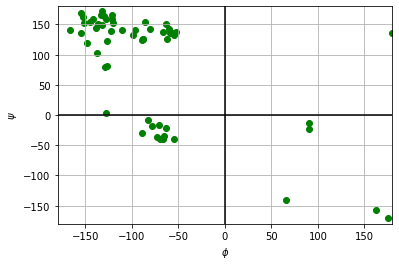

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(phi_list,psi_list, c='green')
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.plot([-180, 180], [0, 0], color="black")
plt.plot([0, 0], [-180, 180], color="black")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\psi$')
plt.grid()

$\color{purple}{\small{\text{▶ Draw a figure with only alpha carbons displayed using chimera or VMD or your favorite tool. Label the secondary structures and active site. Insert your figure in the cell below.}}}$


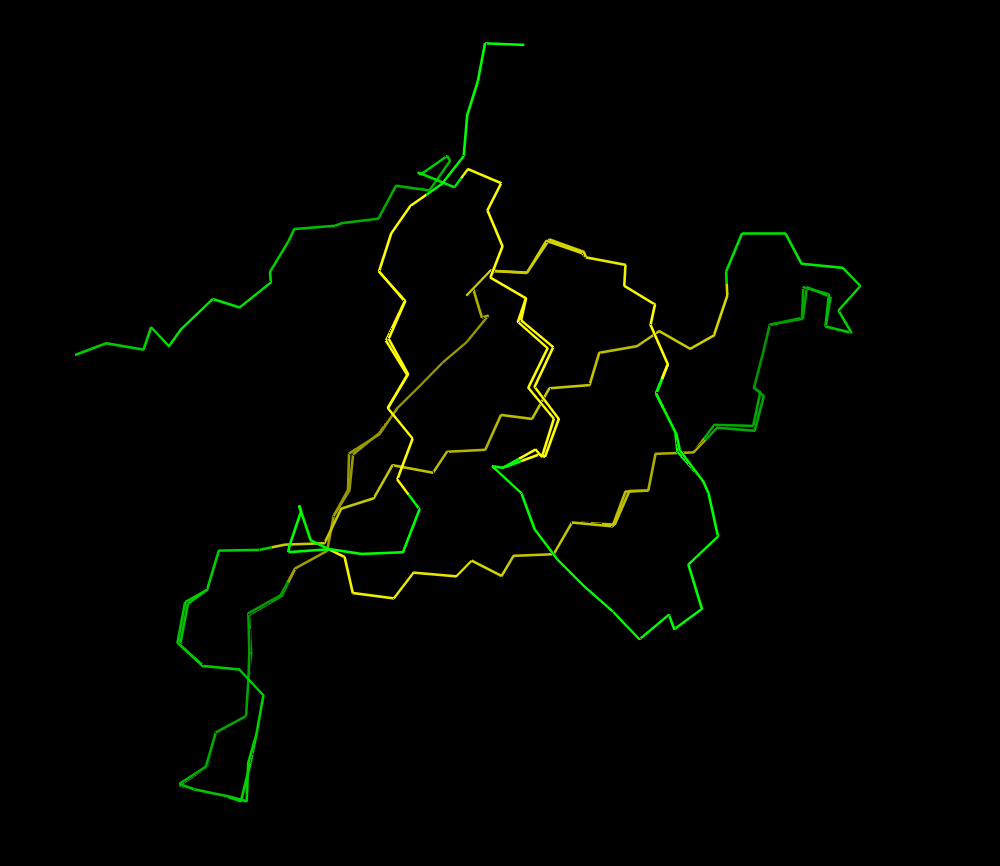

the beta sheets are labelled yellow

ref:
https://pymolwiki.org/index.php/Show



---



$\color{red}{\text{Calculations Part - B (Total: 40 points)}}$

$\color{purple}{\small{\text{▶ Calculate the coordination number of each residue, draw residue versus coordination number for the protein.}}}$

$\color{purple}{\small{\text{If i and j are two amino acids, calculate a contact if and only if } abs(i - j) \geq 4.}}$

In [291]:
def coor_number(pdb_dict):
  coor_no = np.zeros(len(pdb_dict))
  print(coor_no.shape)
  for i in range(len(pdb_dict)):
    for j in range(len(pdb_dict)):
      if (abs(np.linalg.norm(np.array(pdb_dict[i+1]['CA'])- np.array(pdb_dict[j+1]['CA'] ))) >= 4 and 
          abs(np.linalg.norm(np.array(pdb_dict[i+1]['CA'])- np.array(pdb_dict[j+1]['CA'] ))) <= 6.8 ):
        coor_no[i] += 1
  return coor_no

In [292]:
coor_no_arr = coor_number(pdb_dict)
coor_no_arr

(57,)


array([ 1.,  0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  7.,  7.,  4.,  2.,
        1.,  2.,  2.,  4.,  5.,  7.,  7., 10.,  6.,  4.,  3.,  3.,  4.,
        3.,  2.,  2.,  6.,  5.,  5.,  8.,  9.,  9.,  9., 10.,  9.,  5.,
        2.,  4.,  4.,  3.,  4.,  5.,  4.,  3.,  6.,  6.,  6.,  2.,  5.,
        6.,  5.,  3.,  3.,  1.])

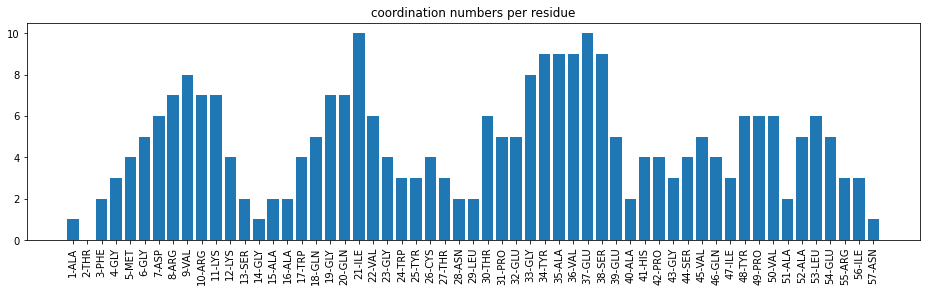

In [293]:
import matplotlib.pyplot as plt

bars = []
for i in range(len(res_dict)):
  bars.append(str(i+1) +"-"+ res_dict[i+1])


y_pos = np.arange(len(bars))

plt.bar(y_pos, coor_no_arr)
plt.title("coordination numbers per residue")
plt.xticks(y_pos, bars,rotation=90)
plt.rcParams["figure.figsize"] = (16,4)

$\color{purple}{\small{\text{▶ Draw the contact map of the protein, indicate which secondary element correspond wherein the map. Which secondary structures contact, shown in the map.}}}$



In [ ]:
def get_contact_matrix(pdb_dict):
  matrix= np.zeros((len(pdb_dict), len(pdb_dict)))
  for i in range(len(pdb_dict)):
    for j in range(len(pdb_dict)):
      dist = np.linalg.norm(np.array(pdb_dict[i+1]['CA'])- np.array(pdb_dict[j+1]['CA'] ))
      matrix[i][j] = dist
      matrix[j][i] = dist
  return matrix

In [ ]:
def plot_contact_map(matrix):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    cax = ax.imshow(matrix, cmap = plt.cm.jet, origin="lower")
    ax.set_title("Contact Map")
    ax.set_xlabel("residue distance in Å")
    ax.set_ylabel("residue distance in Å")
      
    cbar = fig.colorbar(cax, cmap = plt.cm.jet)
    
    return 
    
#got help from:
#https://birdlet.github.io/2017/08/08/trj_contact_map/

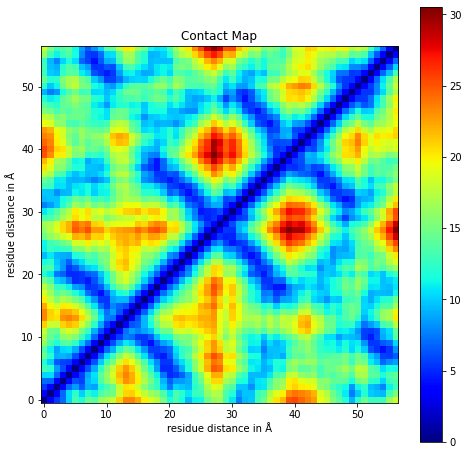

In [ ]:
contact_matrix = get_contact_matrix(pdb_dict)

plot_contact_map(contact_matrix)

$\color{purple}{\small{\text{▶ Find the accessible surface areas of the residues, you might use any of the following programs:}}}$ <br>


* $\color{purple}{\small{\text{FREESASA}}}$ (https://freesasa.github.io/)
* $\color{purple}{\small{\text{GETAREA}}}$ (http://curie.utmb.edu/getarea.html)
* $\color{purple}{\small{\text{MSMS}}}$ (http://mgltools.scripps.edu/packages/MSMS/)
* $\color{purple}{\small{\text{Any other program of your choice}}}$


In [ ]:
#i copied them from the output page
SASAs = [61.67, 92.39, 80.43, 16.49, 41.27, 143.17, 51.20, 41.00, 92.09, 0.58, 0.00, 0.00, 133.78, 93.60, 78.34, 85.04, 112.00, 0.00, 79.53, 2.82, 0.00, 3.70, 58.69, 
         29.16, 0.00, 74.64, 0.00, 116.46, 0.00, 0.00, 31.93, 0.00, 62.34, 0.19, 8.98, 15.32, 3.32, 60.93, 17.02, 92.15, 84.96, 142.03, 0.00, 83.64, 0.00, 89.29, 0.00,
         103.97, 41.76, 59.29, 37.32, 78.06, 34.64, 11.60, 0.00, 158.74, 51.40, 173.32]

See the faction of the output page below:

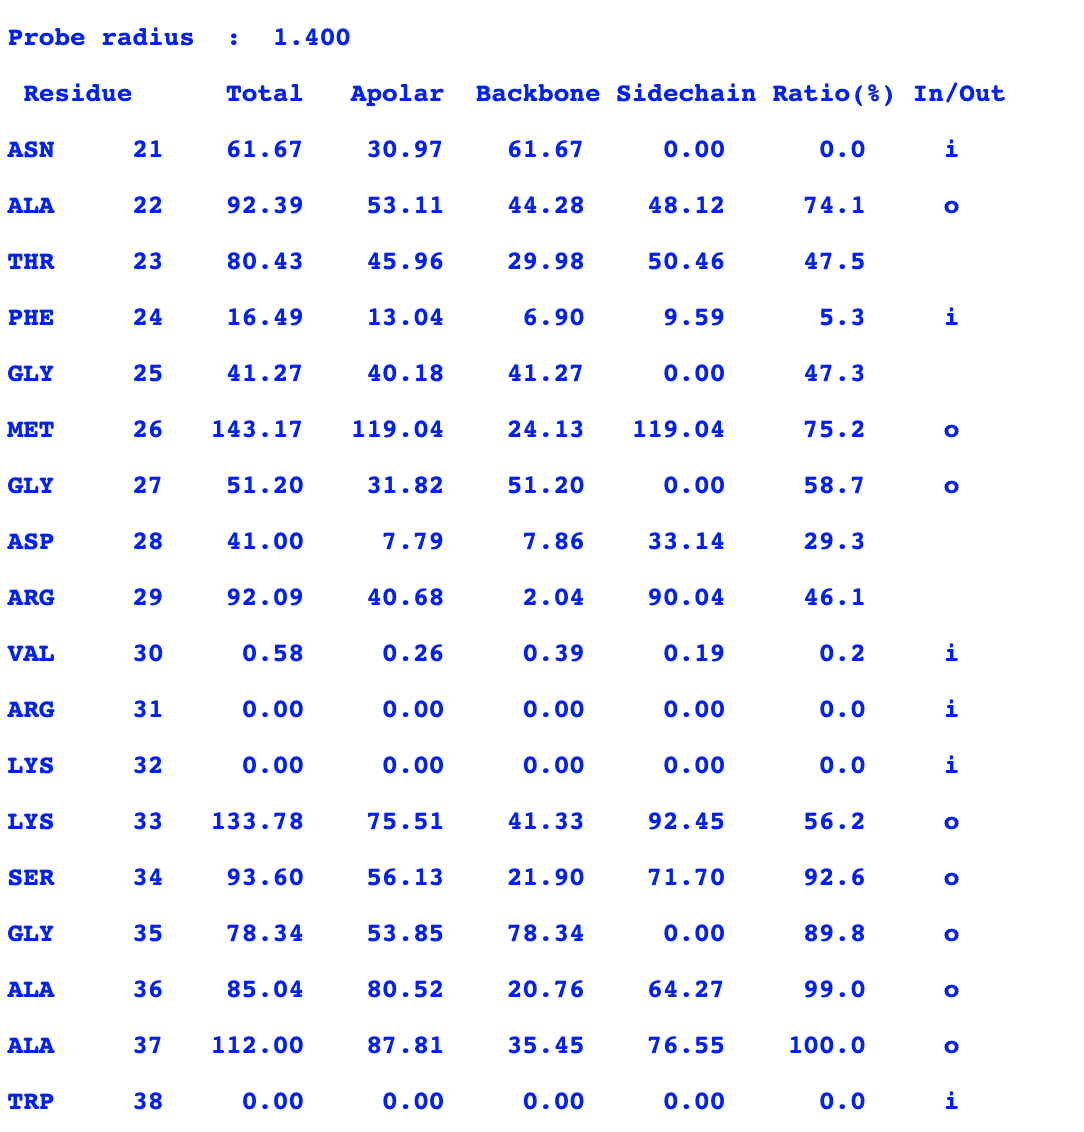

http://curie.utmb.edu/cgi-bin/xgetarea.cgi

i used GETAREA with probe 1.4 angstrom
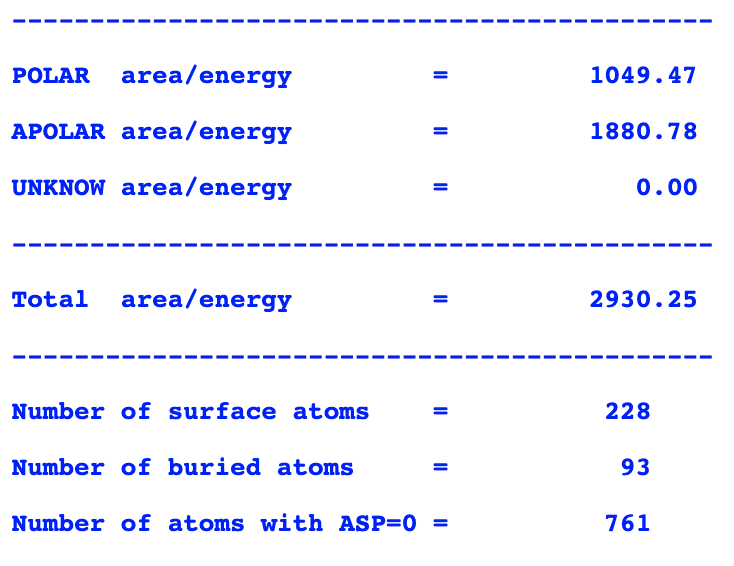



$\color{purple}{\small{\text{▶ Use the following server}}}$ http://expasy.org/tools/protscale.html $\color{purple}{\small{\text{to find the hydrophobicity scale using}}}$ [Kyte & Doolittle](https://web.expasy.org/protscale/pscale/Hphob.Doolittle.html) $\color{purple}{\small{\text{parameters}}}$.

In [307]:
#i took the server result link to get the results with wget
!wget https://web.expasy.org/tmp/scoresmin5907.txt
hphob_vs_kytedoolittle = np.loadtxt("scoresmin5907.txt")
#hphob_vs_kytedoolittle


--2022-04-25 19:42:05--  https://web.expasy.org/tmp/scoresmin5907.txt
Resolving web.expasy.org (web.expasy.org)... 192.33.215.161
Connecting to web.expasy.org (web.expasy.org)|192.33.215.161|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.expasy.org/not_found [following]
--2022-04-25 19:42:05--  https://www.expasy.org/not_found
Resolving www.expasy.org (www.expasy.org)... 192.42.198.75
Connecting to www.expasy.org (www.expasy.org)|192.42.198.75|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: / [following]
--2022-04-25 19:42:05--  https://www.expasy.org/
Reusing existing connection to www.expasy.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 292153 (285K) [text/html]
Saving to: ‘scoresmin5907.txt.11’

scoresmin5907.txt.1 100%[===================>] 285.31K  --.-KB/s    in 0.05s   

2022-04-25 19:42:06 (5.35 MB/s) - ‘scoresmin5907.txt.11’ saved [292153/292153]



array([[ 5.000e+00, -1.256e+00],
       [ 6.000e+00, -1.856e+00],
       [ 7.000e+00, -1.644e+00],
       [ 8.000e+00, -6.780e-01],
       [ 9.000e+00, -3.890e-01],
       [ 1.000e+01, -3.440e-01],
       [ 1.100e+01, -3.440e-01],
       [ 1.200e+01,  3.560e-01],
       [ 1.300e+01,  3.560e-01],
       [ 1.400e+01,  7.560e-01],
       [ 1.500e+01,  9.670e-01],
       [ 1.600e+01,  1.056e+00],
       [ 1.700e+01,  2.000e-01],
       [ 1.800e+01,  2.000e-01],
       [ 1.900e+01,  1.670e-01],
       [ 2.000e+01,  8.670e-01],
       [ 2.100e+01,  5.110e-01],
       [ 2.200e+01,  2.560e-01],
       [ 2.300e+01, -1.000e-01],
       [ 2.400e+01, -3.110e-01],
       [ 2.500e+01, -7.220e-01],
       [ 2.600e+01,  1.330e-01],
       [ 2.700e+01, -5.670e-01],
       [ 2.800e+01, -9.220e-01],
       [ 2.900e+01, -1.667e+00],
       [ 3.000e+01, -1.711e+00],
       [ 3.100e+01, -1.967e+00],
       [ 3.200e+01, -1.722e+00],
       [ 3.300e+01, -1.133e+00],
       [ 3.400e+01, -7.330e-01],
       [ 3

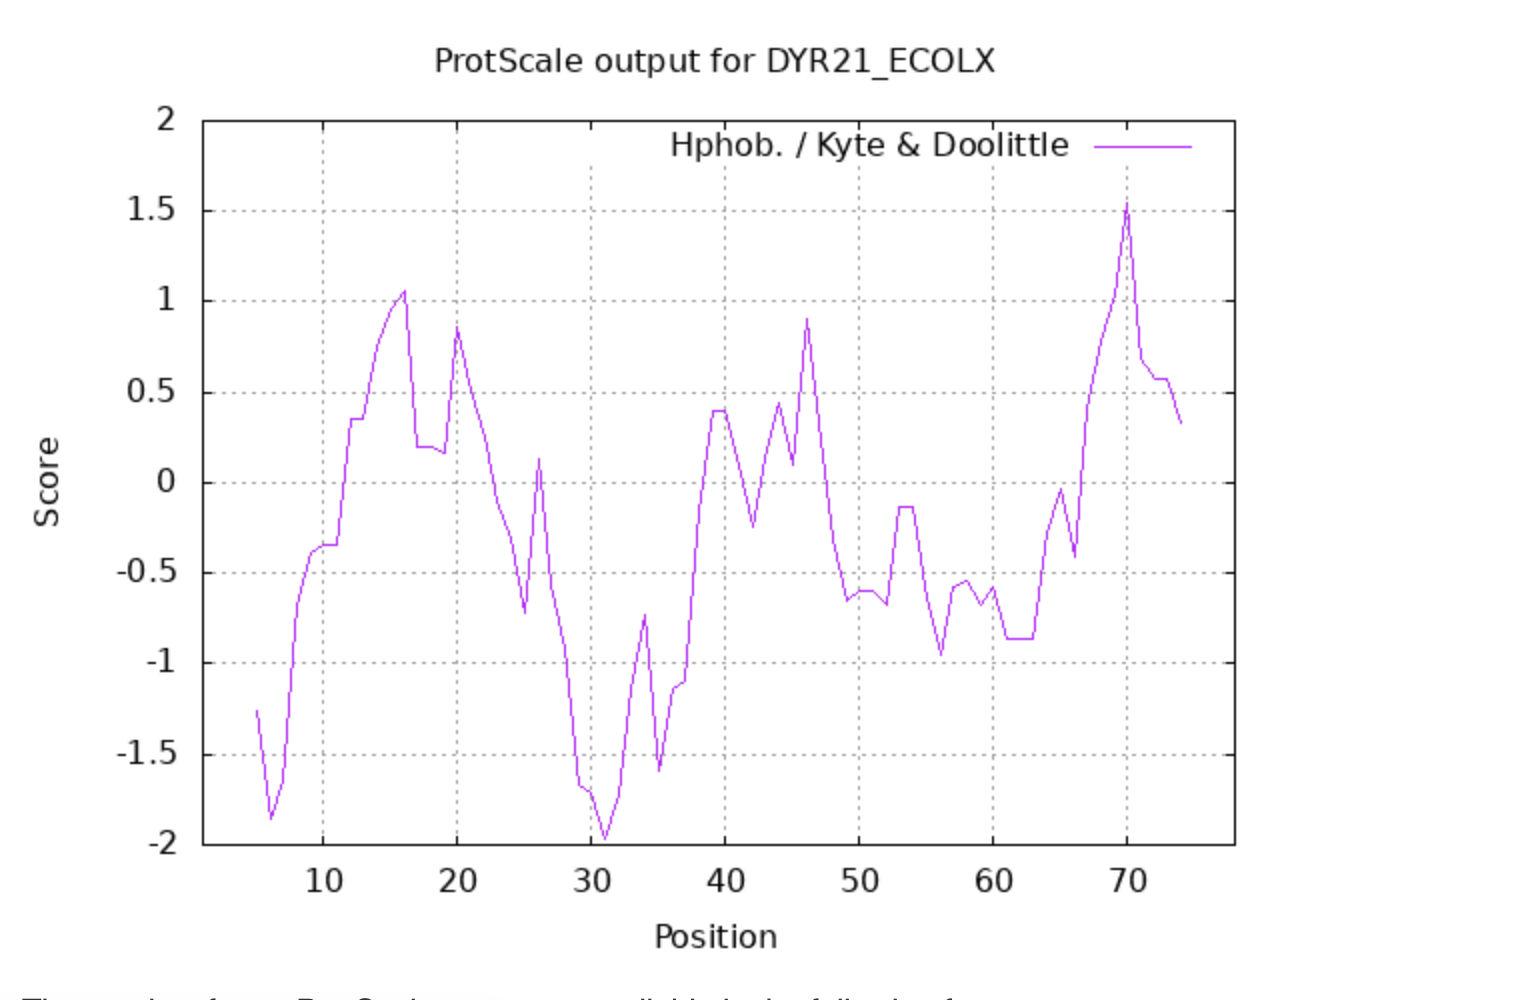

$\color{purple}{\small{\text{▶ Draw the }}}$


$\color{purple}{\small{\text{1. residue versus coordination number}}}$ <br>
$\color{purple}{\small{\text{2. hydrophobicity versus accessible surface area graphs}}}$

$\color{purple}{\small{\text{and see if there is a correlation between them.}}}$



In [323]:
hydrophobicites = []
for i in range(len(pdb_dict)-3): #there isnt a hydrophobicity value for the res no's >74
  hydrophobicites.append(hphob_vs_kytedoolittle[16+i][1]) #the structure file starts from res no 21 (hence +16)
  #thus res nos are [21,74]

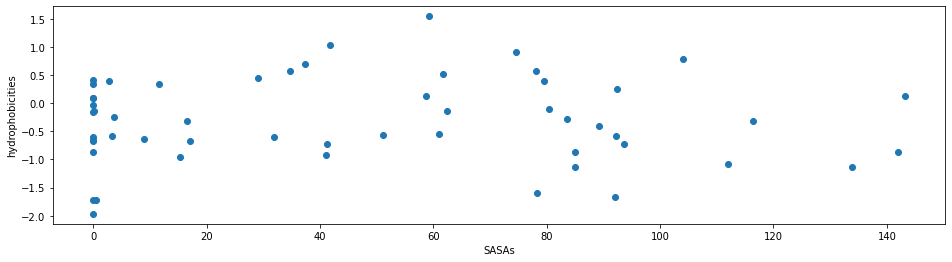

In [319]:
plt.ylabel("hydrophobicities")
plt.xlabel("SASAs")
plt.scatter(SASAs[:-4], hydrophobicites) #there are no hydrophobicity value for the res no's >74

***ANSWERS***

1- Residue number versus coordination number was plotted above, it can be seen that they have no clear correlation 

2- From the plot right above we can see no correlation between hydrophobicities and SASAs

$\color{purple}{\small{\text{▶ Find the SCOP domain of this protein. We will cover SCOP after folding lectures}}}$


FAMILY
R67 dihydrofolate reductase

SCOP ID: 8024446

https://scop.mrc-lmb.cam.ac.uk/term/8024446



---



**Make sure that you saved your work, download this notebook as .ipynb and upload to Blackboard for submission**